# Customer Churn EDA 


In [19]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

df  = pd.read_csv('rawdata.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing the blanks in Total Charges with 0 as tenure is 0.

In [ ]:

df['TotalCharges']= df['TotalCharges'].replace(" ", "0")
df['TotalCharges']= df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

0

In [13]:
df["customerID"].duplicated().sum()

0

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else: 
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

##### Converted the 0 and 1 value of Senior Citizens to simplify the dataset

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


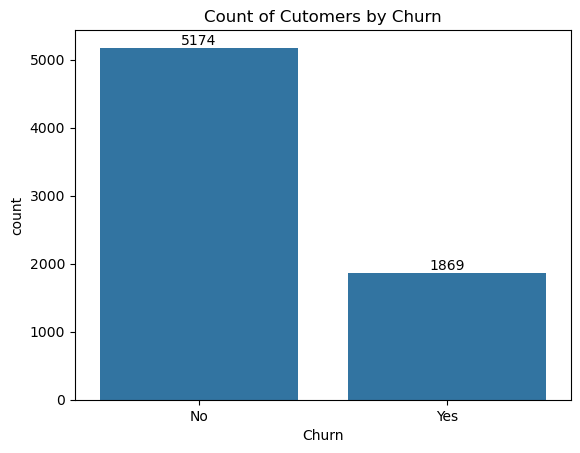

In [40]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Cutomers by Churn")
plt.show()

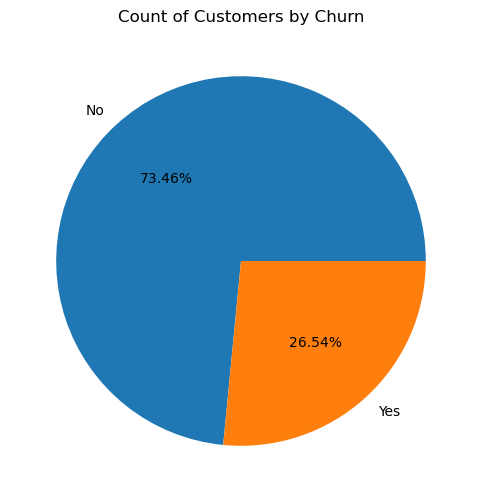

In [41]:
plt.figure(figsize =(6,6))
gb = df.groupby("Churn").agg({"Churn" : "count"})

plt.pie(x = 'Churn', data = gb , labels = gb.index , autopct = "%1.2f%%")
plt.title("Count of Customers by Churn")
plt.show()

##### From the given pie chart we can conclude that 26.54% of the customers churned out

##### --> Now Explore reasons Behind.

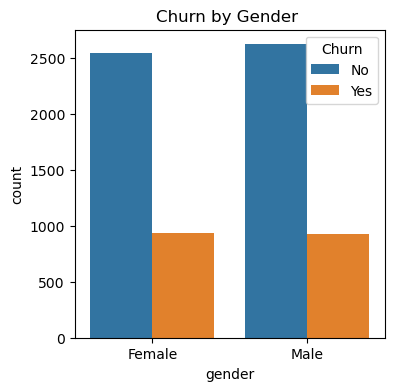

In [54]:
plt.figure(figsize = (4,4))
sns.countplot(x ="gender" , data = df , hue = "Churn")
plt.title("Churn by Gender ")
plt.show()

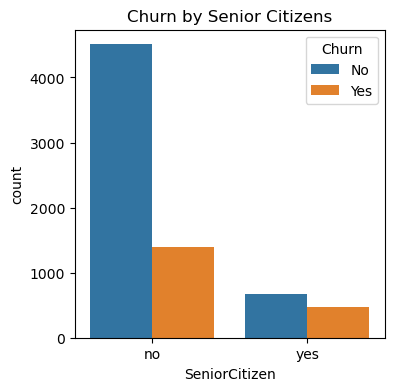

In [55]:
plt.figure(figsize = (4,4))
sns.countplot(x='SeniorCitizen', data =df , hue = 'Churn')
plt.title("Churn by Senior Citizens")
plt.show()

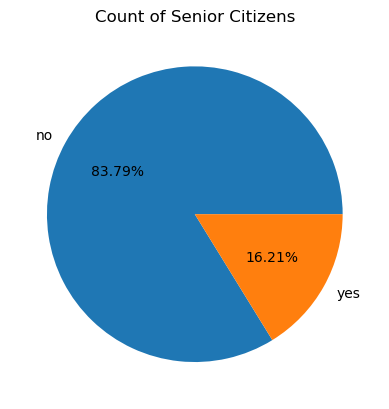

In [64]:
gb = df.groupby("SeniorCitizen").agg({"SeniorCitizen":"count"})
plt.pie(gb['SeniorCitizen'], labels = gb.index ,autopct = "%1.2f%%") 
plt.title("Count of Senior Citizens")

plt.show()

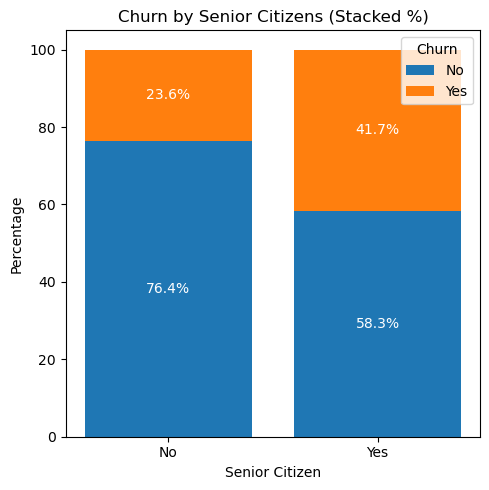

In [65]:

count_data = pd.crosstab(df['SeniorCitizen'], df['Churn'])

percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(5, 5))


bottom_vals = [0] * len(percent_data)
colors = ['#1f77b4', '#ff7f0e']  

for i, col in enumerate(percent_data.columns):
    ax.bar(percent_data.index,
           percent_data[col],
           bottom=bottom_vals,
           label=col,
           color=colors[i])


    for j, val in enumerate(percent_data[col]):
        ax.text(j, bottom_vals[j] + val / 2, f"{val:.1f}%", ha='center', va='center', color='white', fontsize=10)
    
    bottom_vals = [bottom_vals[k] + percent_data[col].iloc[k] for k in range(len(bottom_vals))]


ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Percentage')
ax.set_title("Churn by Senior Citizens (Stacked %)")
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

##### Comparatively a greater percentage of people who are senior citizens have churned.

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


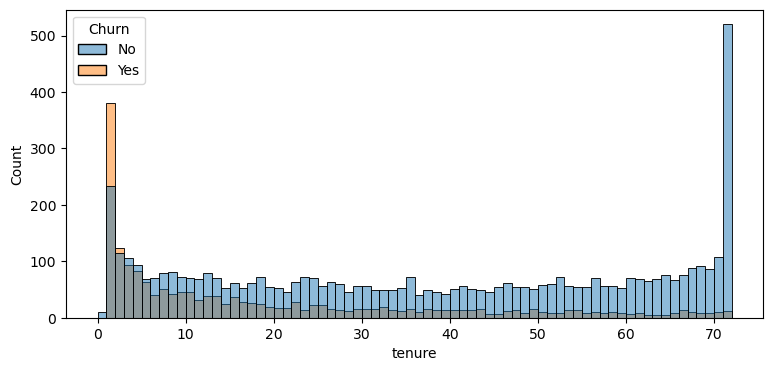

In [70]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df , bins = 72 , hue = "Churn")

plt.show()

##### People who have used our services for long time, have stayed and people who have used our services for short tenure have churned.

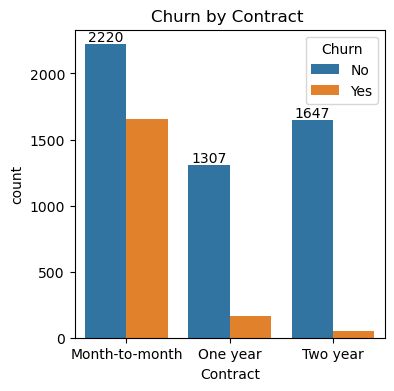

In [73]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x ="Contract" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract ")
plt.show()

##### People who have month to month contract are more likely to churn over people who have long term plans.

In [81]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

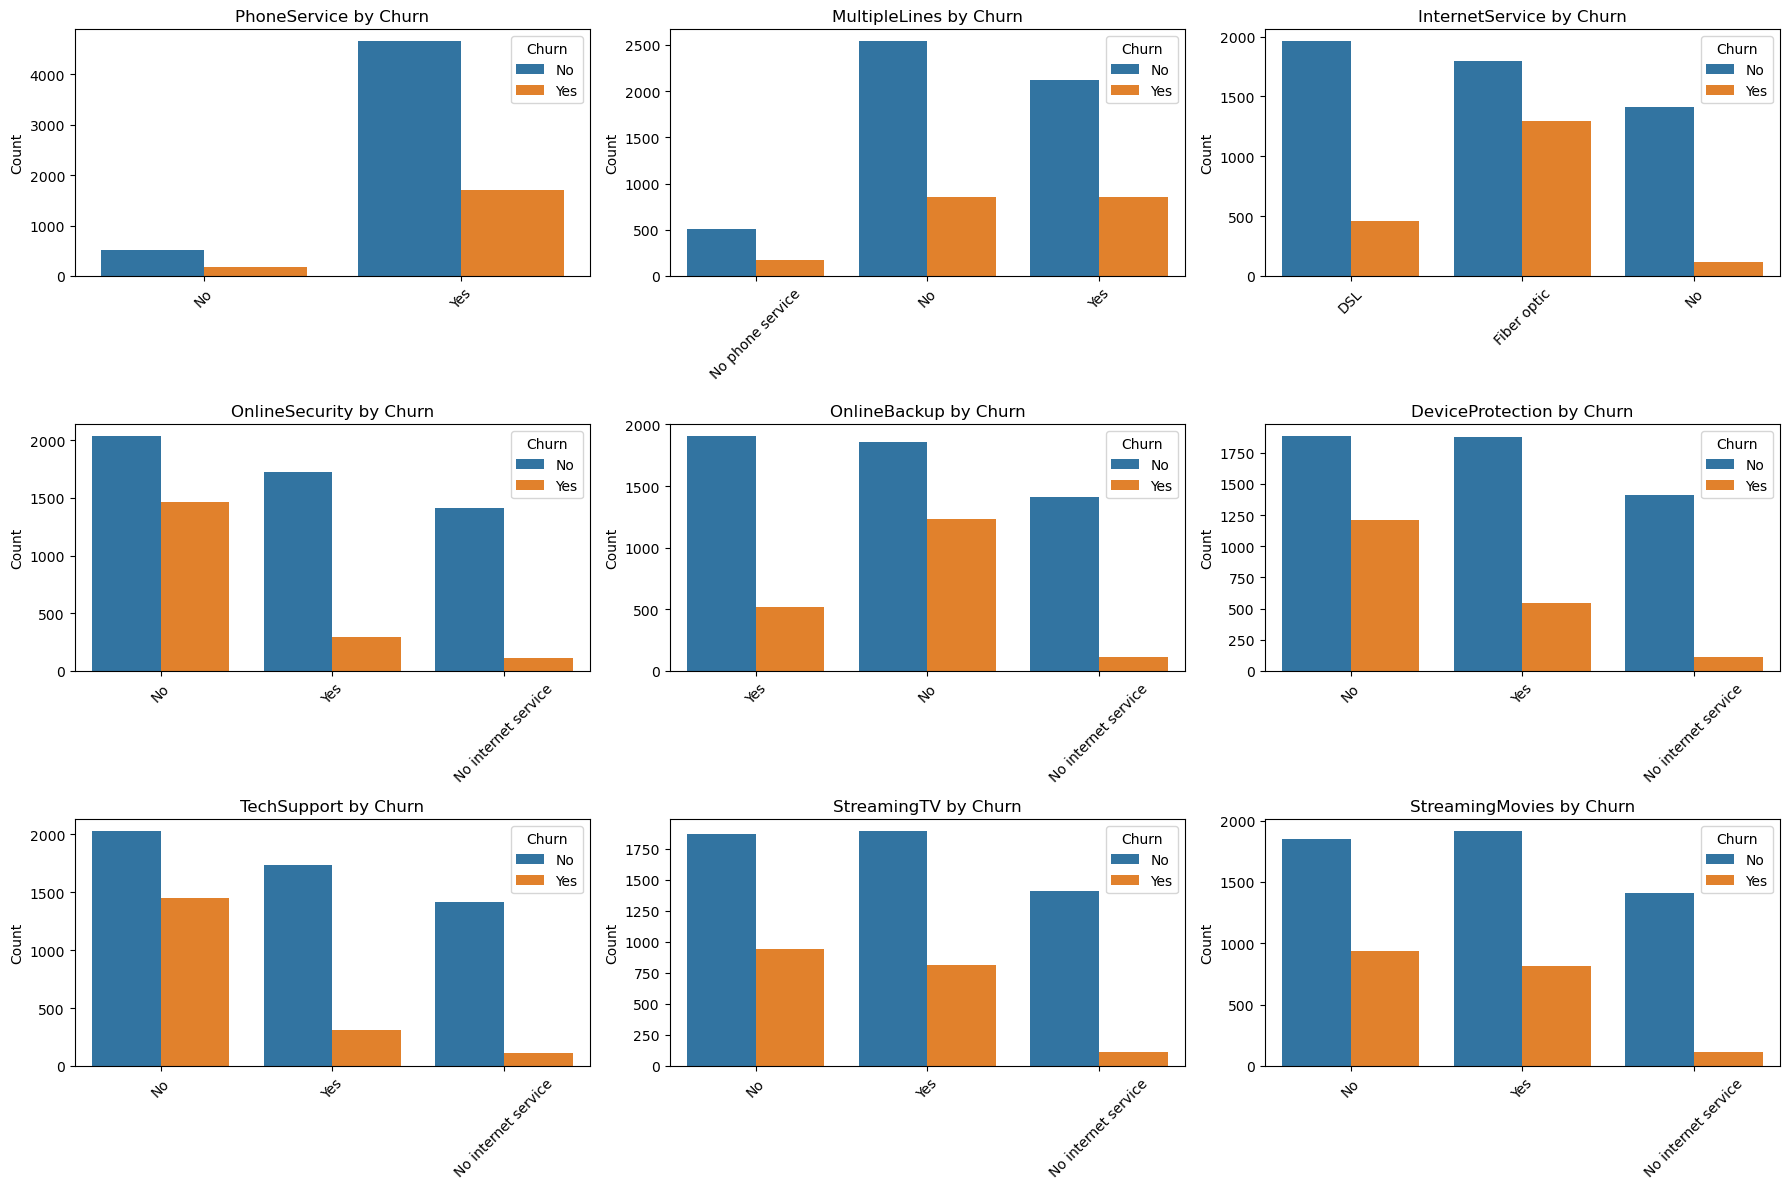

In [84]:
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3  
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 4 * n_rows))  

for idx, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=column, data=df, hue='Churn')
    plt.title(f'{column} by Churn')
    plt.xticks(rotation=45)  
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Customers who subscribe to additional services like OnlineSecurity, TechSupport, and DeviceProtection tend to churn less, indicating these features contribute to customer retention. 
##### In contrast, users with Fiber optic internet and streaming services show higher churn rates, possibly due to pricing or unmet expectations. 

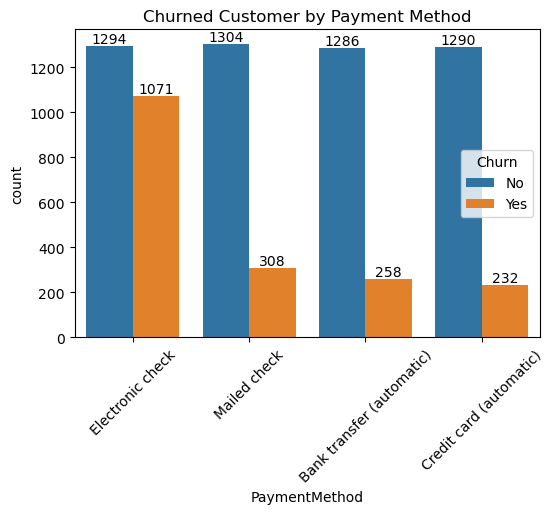

In [91]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x = "PaymentMethod", data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by Payment Method")
plt.xticks(rotation = 45)
plt.show()


##### Customer is likely to churn when he's using Electronic check as a mode of Payment